In [1]:
## Based on
#  - https://realpython.com/linear-regression-in-python/
#  - https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Local data cache
datadir = '../common-data/covid/'
datafile = datadir + "data.csv"

In [4]:
# Read data from local file
data = pd.read_csv(datafile, parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398852 entries, 0 to 398851
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    398852 non-null  datetime64[ns]
 1   county  398852 non-null  object        
 2   state   398852 non-null  object        
 3   fips    394858 non-null  float64       
 4   cases   398852 non-null  int64         
 5   deaths  398852 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ MB


In [6]:
# Finding the number of cases in a state and county
condition = (data['state'] =='South Carolina') 
data_sc = data[condition]

In [7]:
# See a sample
data_sc.head()

,date,county,state,fips,cases,deaths
637,2020-03-06,Charleston,South Carolina,45019.0,1,0
638,2020-03-06,Kershaw,South Carolina,45055.0,1,0
729,2020-03-07,Charleston,South Carolina,45019.0,1,0
730,2020-03-07,Kershaw,South Carolina,45055.0,1,0
838,2020-03-08,Charleston,South Carolina,45019.0,1,0


In [8]:
# Get its statistics
data_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 637 to 398070
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6280 non-null   datetime64[ns]
 1   county  6280 non-null   object        
 2   state   6280 non-null   object        
 3   fips    6280 non-null   float64       
 4   cases   6280 non-null   int64         
 5   deaths  6280 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 343.4+ KB


In [9]:
# Seeing visually if there is a relationship between cases and deaths
import matplotlib.pyplot as plt
%matplotlib inline

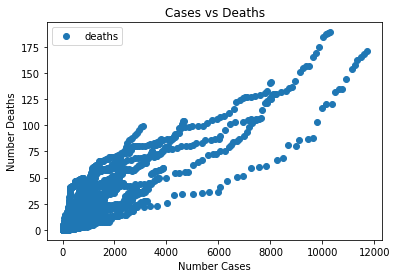

In [10]:
data_sc.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Number Cases')
plt.ylabel('Number Deaths')
plt.show()

In [39]:
# We will create a column to signify whether data is for Richland county or not
data_sc['richland?'] = data_sc.apply(lambda x: ('Y' if (x['county'] == 'Richland') else 'N'), axis=1 )

<ipython-input-39-f1cc2958aa83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sc['richland?'] = data_sc.apply(lambda x: ('Y' if (x['county'] == 'Richland') else 'N'), axis=1 )


In [40]:
data_sc.head()

,date,county,state,fips,cases,deaths,richland?
637,2020-03-06,Charleston,South Carolina,45019.0,1,0,N
638,2020-03-06,Kershaw,South Carolina,45055.0,1,0,N
729,2020-03-07,Charleston,South Carolina,45019.0,1,0,N
730,2020-03-07,Kershaw,South Carolina,45055.0,1,0,N
838,2020-03-08,Charleston,South Carolina,45019.0,1,0,N


In [65]:
# Imports for classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [66]:
# Get the data of interest
x = data_sc ['cases']
y = data_sc ['richland?']

In [67]:
data_sc['richland?'].value_counts()

N    6140
Y     140
Name: richland?, dtype: int64

In [68]:
# Type and shape changes
x, y = np.array(x), np.array(y)

In [69]:
x = x.reshape(-1,1)

In [70]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [71]:
print (x_train.size, x_test.size, y_train.size, y_test.size)

5024 1256 5024 1256


In [72]:
# Train a linear regression mode
logreg = LogisticRegression(C=1e5)
model = logreg.fit(x_train, y_train)

In [73]:
# Model information
print (' Model details:')
print (' -  intercept : ', model.intercept_)
print (' -  coeff : ', model.coef_)

 Model details:
 -  intercept :  [-4.14079458]
 -  coeff :  [[0.00039223]]


In [74]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [75]:
# Define a function to predict error statistics
def print_stats(y_actual, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

In [78]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [79]:
CM = confusion_matrix(y_test, y_pred_test)
print (CM)

[[1233    2]
 [  21    0]]
